In [32]:
# necessary LIbraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
import warnings
warnings.filterwarnings("ignore")
plt.style.use('seaborn')

In [34]:
data=pd.read_csv("car data.csv")

# Data Inspection

In [35]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [36]:
data.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [37]:
data.shape

(301, 9)

In [38]:
data.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [40]:
# statistics of the data
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


# Data Cleaning & Pre processing

<h2>Missing Value Handling</h2>

In [41]:
# Check the null values in the dataset
data.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

no null values present in the dataset

In [42]:
# split the data into numerical & categorical variables
cat_var=data.select_dtypes(exclude=["int64","float64"])
num_var=data.select_dtypes(exclude=["object"])
num_var.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000,0
1,2013,4.75,9.54,43000,0
2,2017,7.25,9.85,6900,0
3,2011,2.85,4.15,5200,0
4,2014,4.60,6.87,42450,0


<h2>Outlier Detection & Handling</h2>

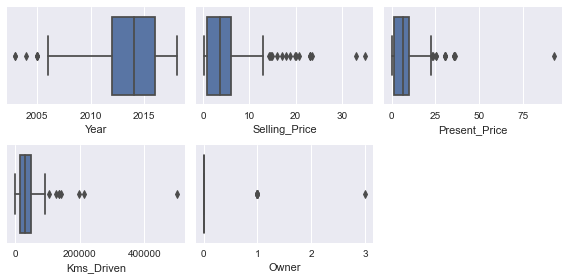

In [43]:
# Check for the outliers in the dataset / Outlier detection & Handling
cols=num_var.columns

for i in enumerate(cols):
#     plt.figure(figsize=[13,5])
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(x=i[1], data=data)
    plt.tight_layout()


Outliers are present in the dataset

<AxesSubplot:title={'center':'Boxplot representation of numerical features'}>

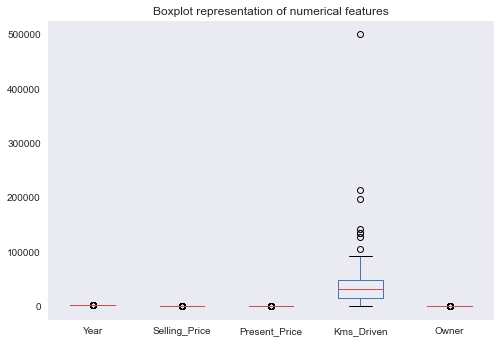

In [44]:
plt.title("Boxplot representation of numerical features")
num_var.boxplot(figsize=(15,5),grid=False)

But we are not handling outliers , since its a small dataset with large no of outliers

In [45]:
# checking for the unique values in categorical columns
print(data["Fuel_Type"].unique())
print(data["Transmission"].unique())
print(data["Seller_Type"].unique())
print(data["Owner"].unique())

['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']
['Dealer' 'Individual']
[0 1 3]


<h2>Feature Reduction & Feature Engineering</h2>

In [46]:
# Remove the Car name column
#print(data["Car_Name"].unique())
data_df=data.drop("Car_Name",axis=1)
data_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [47]:
# Feature Engineering
data_df["Age"]=2022-data_df["Year"]
data_df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [48]:
# remove the year column
data_df=data_df.drop("Year",axis=1)
data_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<h2>Exploratory Data Analysis(EDA)</h2>

a. Univariate Analysis

In [49]:
data_df[data_df['Present_Price'] > data_df['Present_Price'].quantile(0.99)]

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
64,33.0,36.23,6000,Diesel,Dealer,Automatic,0,5
86,35.0,92.60,78000,Diesel,Dealer,Manual,0,12


In [50]:
data_df['Present_Price'].quantile(0.99)

35.96

b.bivariate Analysis/ Multivariate Analysis

In [51]:
data_df.pivot_table(values="Selling_Price",index="Fuel_Type", columns="Seller_Type")

Seller_Type,Dealer,Individual
Fuel_Type,,
CNG,3.100000,NaN
Diesel,10.181525,16.000000
Petrol,5.252388,0.726857


In [52]:
data_df.pivot_table(values="Selling_Price",index="Seller_Type", columns="Transmission")

Transmission,Automatic,Manual
Seller_Type,,
Dealer,12.246552,5.756506
Individual,1.968182,0.743895


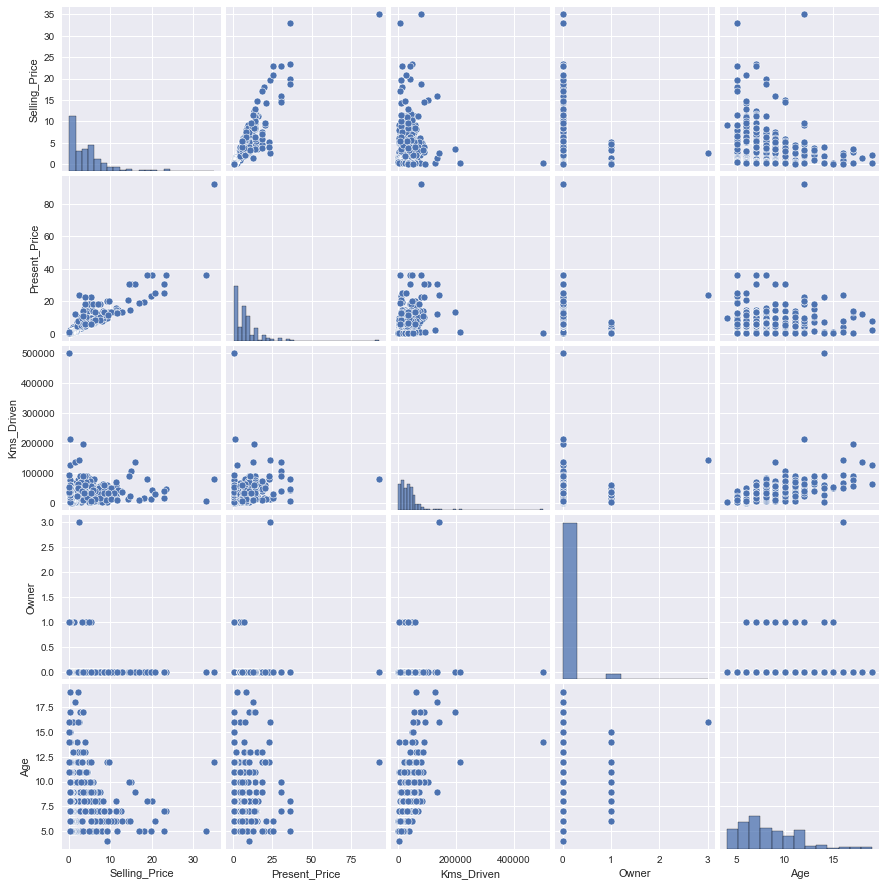

In [53]:
sns.pairplot(data_df)

<h2>Encoding</h2>

In [54]:
# apply one hot encoding to Fuel_type , Seller type & Transmission column

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

cols_one=['Fuel_Type','Seller_Type','Transmission']

for i in cols_one:
    #integer_encoding
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(data_df[i])
    #print(integer_encoded)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    ### One hot encoding
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    onehot_encoded=pd.DataFrame(onehot_encoded,columns=data_df[i].value_counts().index)
    data_df=pd.concat([data_df, onehot_encoded], axis=1)

data_df.drop(['Fuel_Type','Seller_Type','Transmission'],axis=1,inplace=True)

In [55]:
data_df

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Petrol,Diesel,CNG,Dealer,Individual,Manual,Automatic
0,3.35,5.59,27000,0,8,0.0,0.0,1.0,1.0,0.0,0.0,1.0
1,4.75,9.54,43000,0,9,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,7.25,9.85,6900,0,5,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,2.85,4.15,5200,0,11,0.0,0.0,1.0,1.0,0.0,0.0,1.0
4,4.60,6.87,42450,0,8,0.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,0.0,1.0,0.0,1.0,0.0,0.0,1.0
297,4.00,5.90,60000,0,7,0.0,0.0,1.0,1.0,0.0,0.0,1.0
298,3.35,11.00,87934,0,13,0.0,0.0,1.0,1.0,0.0,0.0,1.0
299,11.50,12.50,9000,0,5,0.0,1.0,0.0,1.0,0.0,0.0,1.0


<AxesSubplot:>

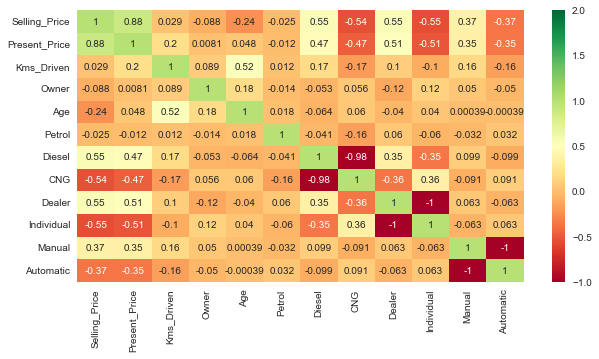

In [56]:
# Check for the Correlation of the features
#get correlations of each features in dataset
#Corrmatrix=data_df[["Selling_Price","Present_Price","Kms_Driven","Owner","Age"]].corr()
Corrmatrix=data_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(Corrmatrix, vmin=-1, vmax=2, cmap="RdYlGn", annot=True)

In [57]:
# Droping COlumns CNG, Individual, Automatic-for Removig the extra columns 
data_df.drop(["CNG","Dealer","Automatic"],axis=1, inplace=True)
data_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Petrol,Diesel,Individual,Manual
0,3.35,5.59,27000,0,8,0.0,0.0,0.0,0.0
1,4.75,9.54,43000,0,9,0.0,1.0,0.0,0.0
2,7.25,9.85,6900,0,5,0.0,0.0,0.0,0.0
3,2.85,4.15,5200,0,11,0.0,0.0,0.0,0.0
4,4.60,6.87,42450,0,8,0.0,1.0,0.0,0.0


<h2>Splitting the data into Dependant & Independant variable</h2>

In [58]:
#our target column is Selling price
y=data_df.iloc[:,0]
x=data_df.iloc[:,1:]
x.head()

,Present_Price,Kms_Driven,Owner,Age,Petrol,Diesel,Individual,Manual
0,5.59,27000,0,8,0.0,0.0,0.0,0.0
1,9.54,43000,0,9,0.0,1.0,0.0,0.0
2,9.85,6900,0,5,0.0,0.0,0.0,0.0
3,4.15,5200,0,11,0.0,0.0,0.0,0.0
4,6.87,42450,0,8,0.0,1.0,0.0,0.0


In [59]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

<h2>Feature Importance</h2>

Since its a linear Model , we will go for regression model

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.tree import DecisionTreeRegressor

In [61]:
dr=DecisionTreeRegressor()

In [62]:
dr.fit(x,y)

DecisionTreeRegressor()

In [63]:
dr.feature_importances_

array([8.92075961e-01, 2.07899260e-02, 1.58169170e-04, 7.97744204e-02,
       1.61280084e-07, 6.68662393e-03, 7.09524850e-05, 4.43786077e-04])

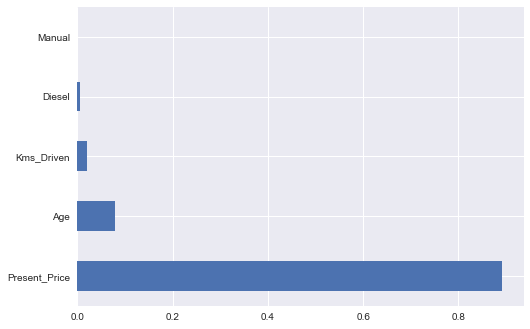

In [64]:
#plot graph of feature importances for better visualization
feature_importance=pd.Series(dr.feature_importances_, index=x.columns)
feature_importance.nlargest(5).plot(kind='barh')
plt.show()

<h2>Spliting the data into train & Test Set</h2>

In [65]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)

(240, 8)
(61, 8)
(240,)


<h2>Model Creation/ Evaluation</h2>

<h4>Apply regressive models since we are predicting numerical value</h4></br>
1.Linear Regression</br>
2.Ridge Regression</br>
3.Lasso Regression</br>
4.Random Forest Regression</br>
5.Gradient Boosting regression</br>

In [66]:
from sklearn.metrics import r2_score

In [67]:
from sklearn.model_selection import cross_val_score

In [68]:
CV=[]
R2_train=[]
R2_test=[]

def car_pred_model(model):
   
    model.fit(x_train,y_train) #Training model
    
    # R2 score of train set
    y_pred_train=model.predict(x_train)
    R2_train_model=r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test=model.predict(x_test)
    R2_test_model=r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    #R2 mean of train set using Cross validation
    #Cross_val_score is a method which runs cross validation on a dataset 
    #to test whether the model can generalise over the whole dataset. 
    cross_val=cross_val_score(model,x_train,y_train,cv=5)
    cv_mean=cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    
     # Plotting Graphs 
     # Residual Plot of train data
    fig,my_grid=plt.subplots(1,2)
    
    my_grid[0].set_title("Residual Plot of Train samples")
    sns.histplot((y_train-y_pred_train),ax=my_grid[0])
    my_grid[0].set_xlabel('y_train - y_pred_train')
    
    
    my_grid[1].set_title("y_test vs y_pred_test")
    sns.scatterplot(x=y_test,y=y_pred_test,ax=my_grid[1])
    my_grid[1].set_xlabel('y_test - y_pred_test')
    

<h2>1.Standard Linear Regression</h2>

In [69]:
from sklearn.linear_model import LinearRegression

Train R2-score : 0.89
Test R2-score : 0.85
Train CV scores : [0.85420812 0.84855467 0.81145104 0.83374004 0.90176495]
Train CV mean : 0.85


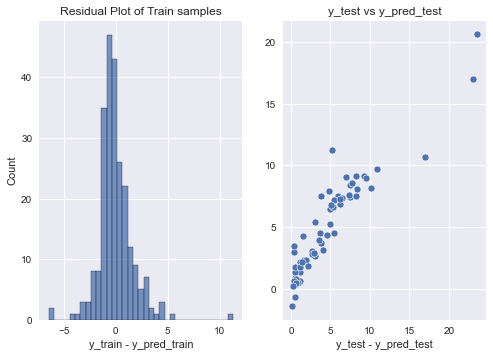

In [70]:
lr=LinearRegression()
car_pred_model(lr)

<h2>2.Ridge Regression</h2>

In [72]:
from sklearn.linear_model import Ridge

Train R2-score : 0.89
Test R2-score : 0.85
Train CV scores : [0.85594736 0.84457886 0.81209849 0.83383499 0.90316696]
Train CV mean : 0.85


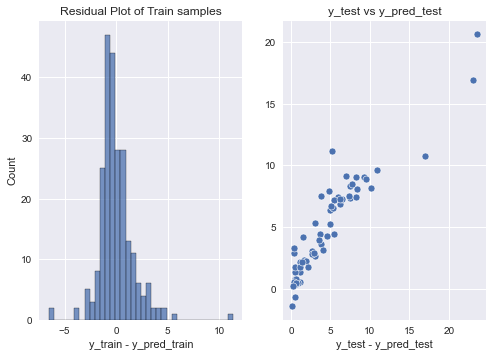

In [73]:
rr=Ridge()
car_pred_model(rr)

<h2>3.Lasso Regression</h2>

In [74]:
from sklearn.linear_model import Lasso

Train R2-score : 0.85
Test R2-score : 0.8
Train CV scores : [0.85898925 0.76170318 0.7536971  0.80534284 0.86184195]
Train CV mean : 0.81


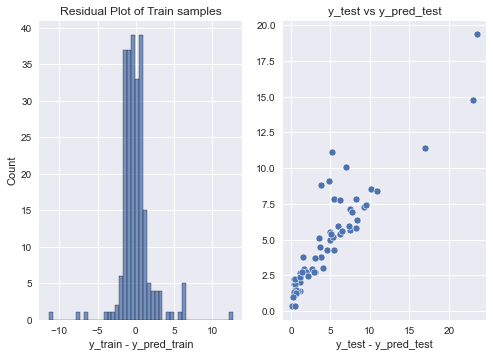

In [75]:
ls=Lasso()
car_pred_model(ls)

<h2>4.Random Forest Regression</h2>

In [76]:
from sklearn.ensemble import RandomForestRegressor

Train R2-score : 0.98
Test R2-score : 0.95
Train CV scores : [0.9617442  0.82308147 0.80209087 0.86010818 0.94456413]
Train CV mean : 0.88


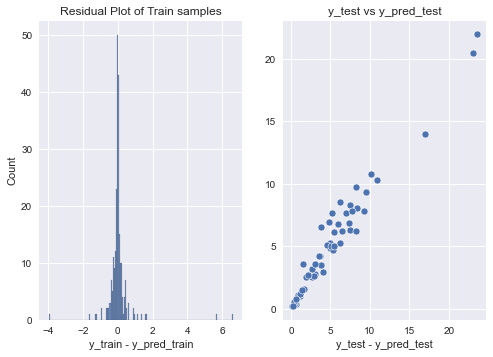

In [77]:
rfr=RandomForestRegressor()
car_pred_model(rfr)

<h2>5.Gradient Boosting regression</h2>

In [78]:
from sklearn.ensemble import GradientBoostingRegressor

Train R2-score : 1.0
Test R2-score : 0.97
Train CV scores : [0.8868126  0.83426906 0.89877376 0.91792267 0.93799786]
Train CV mean : 0.9


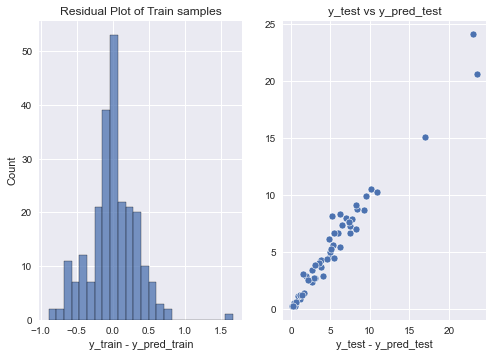

In [79]:
gb=GradientBoostingRegressor()
car_pred_model(gb)

In [80]:
cols=["Linear Regression","Ridge Regression","Lasso Regression","Random Forest Regression","Gradient Boosting regression"]
Mode_eval=pd.DataFrame({"Model":cols ,"R2_train":R2_train,"R2_test":R2_test,"CV":CV})
Mode_eval

,Model,R2_train,R2_test,CV
0,Linear Regression,0.89,0.85,0.85
1,Ridge Regression,0.89,0.85,0.85
2,Lasso Regression,0.85,0.80,0.81
3,Random Forest Regression,0.98,0.95,0.88
4,Gradient Boosting regression,1.00,0.97,0.90


From the above table , we will gor for Random Forest Regression

<h2>Hyper Parameter Tuning in Random Forest Regression Model</h2>

In [85]:
# to see the estimator parameter
from sklearn.ensemble import RandomForestRegressor
rdc=RandomForestRegressor()
rdc.estimator_params

('criterion',
 'max_depth',
 'min_samples_split',
 'min_samples_leaf',
 'min_weight_fraction_leaf',
 'max_features',
 'max_leaf_nodes',
 'min_impurity_decrease',
 'random_state',
 'ccp_alpha')

In [86]:
# using RandomisedsearchCV, finding teh best parameter
from sklearn.model_selection import RandomizedSearchCV

In [94]:
 #Randomized Search CV
    
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [95]:
# Create the random grid
random_grid={"n_estimators":n_estimators,
            'max_features':max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
            "min_samples_leaf":min_samples_leaf}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [98]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rdc_random=RandomizedSearchCV(estimator=rdc,param_distributions=random_grid,n_iter=10,cv=5,verbose=2)


In [99]:
rdc_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=100, n_estimators=800; total time=   1.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

In [100]:
rdc_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10}

In [101]:
rdc_random.best_score_

0.8771882491311519

In [102]:
yPred=rdc_random.predict(x_test)

In [110]:
yPred

array([ 0.43791439, 10.92560208,  4.93221715,  0.21798872,  7.63141974,
        6.32496132,  1.09858326,  0.58041678,  0.47230836,  6.73244429,
        7.94127054,  1.08097912,  8.25841995,  0.45369241,  5.36753661,
        2.65540625,  1.15855763, 14.35978125,  0.47463408,  1.5658125 ,
        0.3500647 ,  8.1171125 ,  4.72545634,  2.70299206,  0.50852933,
        3.59505351,  5.34097787,  3.13418748,  1.20216335,  1.17096289,
        0.41456445,  9.8457374 ,  0.4689863 ,  2.58432083,  7.75361293,
        4.26918923,  6.39060496,  6.39036488,  2.66976042,  6.85557738,
        4.34909821,  3.58682917,  4.99115635,  0.56298447,  6.18517164,
        0.77345211,  8.34034936,  7.09225   ,  2.92649107,  3.62219456,
        4.95976082,  1.52623333, 21.99165   , 20.3117    ,  6.43187985,
       10.45967083,  5.06908997,  8.97308927,  2.67630174,  6.8485843 ,
        0.2392841 ])

<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

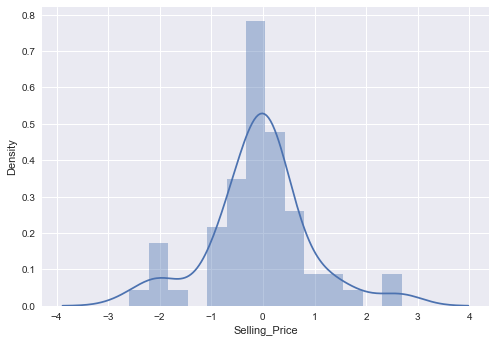

In [104]:
sns.distplot(y_test-yPred)

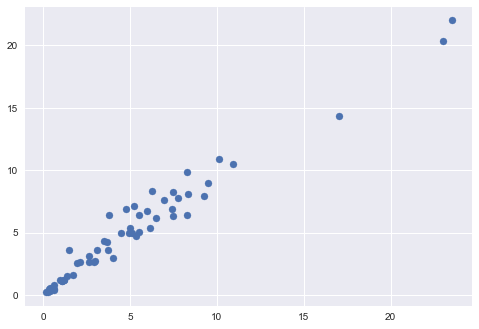

In [105]:
plt.scatter(y_test,yPred)

In [108]:
# checking the MSE value
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_squared_error

In [109]:
print("MAE:",mean_absolute_error(y_test,yPred))
print("MSE:",mean_squared_error(y_test,yPred))
print("RMSE:",np.sqrt(mean_squared_error(y_test,yPred)))

MAE: 0.6443294861148353
MSE: 0.9505370780537865
RMSE: 0.9749549107798712
